### Dry Bean Class Prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ml specific imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# algorithm
# linear classfication
from sklearn.linear_model import LogisticRegression
# tree classfication
from sklearn.tree import DecisionTreeClassifier
# neighbour classification
from sklearn.neighbors import KNeighborsClassifier
# naive bayes classification
from sklearn.naive_bayes import GaussianNB
# support vection machine classification
from sklearn.svm import SVC
# ensemble
from sklearn.ensemble import RandomForestClassifier

Load the dataset and explore it

In [24]:
df = pd.read_csv('../data/Dry_Bean_Dataset.csv')
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [26]:
df.isnull().sum() 

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['Class'])

Get All Feature

In [28]:
X = df.drop('Class', axis=1) # features

Pipeline for Prediction

In [29]:
X.shape

(13611, 16)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
# 1. Logistic Regression
k = 10
clf1 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', LogisticRegression(solver='saga'))
])
# 2. Decision Tree
clf2 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', DecisionTreeClassifier())
])
# 3. Nearest Neighbors
clf3 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', KNeighborsClassifier())
])
# 4. Gaussian Naive Bayes
clf4 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', GaussianNB())
])

# 5. Support Vector Machine
clf5 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', SVC())
])

# 6. Random Forest
clf6 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', RandomForestClassifier())
])

In [31]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)
# train the model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x0000018FCD662520>)),
                ('classification', RandomForestClassifier())])

In [32]:
ypred1 = clf1.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf3.predict(X_test)
ypred4 = clf4.predict(X_test)
ypred5 = clf5.predict(X_test)
ypred6 = clf6.predict(X_test)

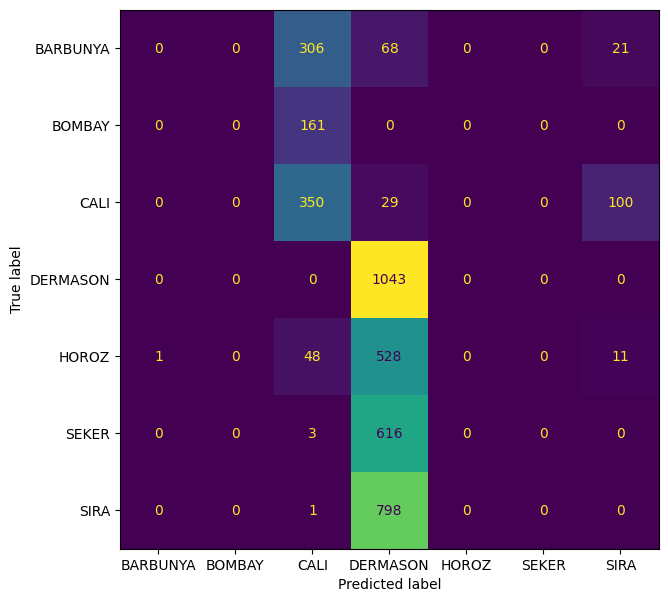

In [33]:
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred1), 
    display_labels=enc.classes_
).plot(ax=ax, colorbar=False)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
print("LOGISTIC REGRESSION")
print('---'*20)
print(classification_report(y_test, ypred1, target_names=enc.classes_))

LOGISTIC REGRESSION
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       395
      BOMBAY       0.00      0.00      0.00       161
        CALI       0.40      0.73      0.52       479
    DERMASON       0.34      1.00      0.51      1043
       HOROZ       0.00      0.00      0.00       588
       SEKER       0.00      0.00      0.00       619
        SIRA       0.00      0.00      0.00       799

    accuracy                           0.34      4084
   macro avg       0.11      0.25      0.15      4084
weighted avg       0.13      0.34      0.19      4084



In [36]:
print("DECISION TREE CLF")
print('---'*20)
print(classification_report(y_test, ypred2, target_names=enc.classes_))

DECISION TREE CLF
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.80      0.83      0.81       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.84      0.82      0.83       479
    DERMASON       0.88      0.88      0.88      1043
       HOROZ       0.94      0.91      0.92       588
       SEKER       0.90      0.90      0.90       619
        SIRA       0.80      0.80      0.80       799

    accuracy                           0.87      4084
   macro avg       0.88      0.88      0.88      4084
weighted avg       0.87      0.87      0.87      4084



In [37]:
print("SUPPORT VECTOR CLF")
print('---'*20)
print(classification_report(y_test, ypred5, target_names=enc.classes_))

SUPPORT VECTOR CLF
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.47      0.06      0.11       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.59      0.88      0.70       479
    DERMASON       0.76      0.84      0.80      1043
       HOROZ       0.61      0.59      0.60       588
       SEKER       0.41      0.25      0.31       619
        SIRA       0.57      0.75      0.64       799

    accuracy                           0.63      4084
   macro avg       0.63      0.62      0.60      4084
weighted avg       0.61      0.63      0.60      4084



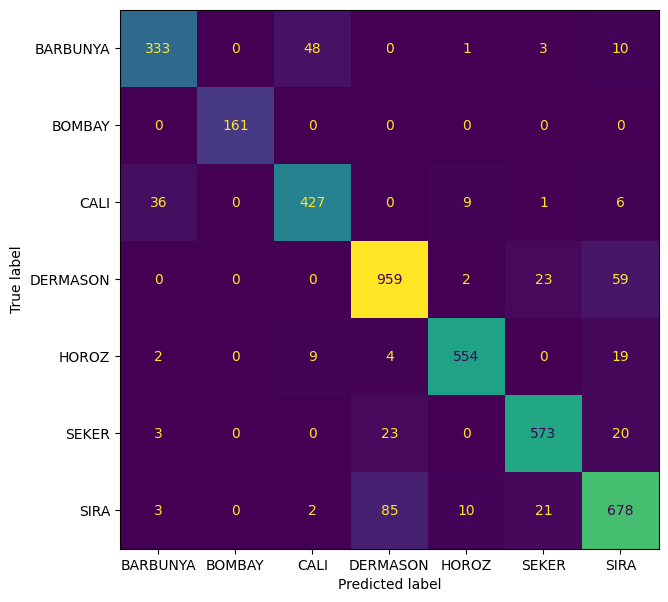

In [38]:
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred6), 
    display_labels=enc.classes_
).plot(ax=ax, colorbar=False)

In [39]:
# save the model, encoder
import joblib
joblib.dump(clf6, 'saved_model.pkl')
joblib.dump(enc, 'saved_encoder.pkl')

['saved_encoder.pkl']

In [40]:
def predict_input(data_dict):
    X_inp = pd.DataFrame([data_dict])
    clf = joblib.load('saved_model.pkl')
    enc = joblib.load('saved_encoder.pkl')
    y_pred = clf.predict(X_inp)
    return enc.inverse_transform(y_pred)[0] # bean class name

In [41]:
# test the function X.iloc[0].todict()
data = {'Area': 28395.0,
 'Perimeter': 1000.291,
 'MajorAxisLength': 608.1781167,
 'MinorAxisLength': 173.888747,
 'AspectRation': 1.197191424,
 'Eccentricity': 0.549812187,
 'ConvexArea': 28715.0,
 'EquivDiameter': 190.1410973,
 'Extent': 0.763922518,
 'Solidity': 0.988855999,
 'roundness': 0.858027126,
 'Compactness': 0.913357755,
 'ShapeFactor1': 0.007331506,
 'ShapeFactor2': 0.003147289,
 'ShapeFactor3': 0.834222388,
 'ShapeFactor4': 0.998723889
}

predict_input(data) # 'DERMASON'

'SEKER'

In [42]:
import gradio as gr

In [43]:
ui = gr.Interface(
    predict_input,
    inputs = [
        gr.Number(label='Area'),
        gr.Number(label='Perimeter', step=.01),
        gr.Number(label='MajorAxisLength', step=.01),
    ],
    outputs = 'text'
)
ui.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
